## CSE 377 - Homework 05

### Kevin Chen - CHEN146 - 113448049

In [1]:
# Importing the libraries to use in this homework assignment

import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
import scipy.signal as sig

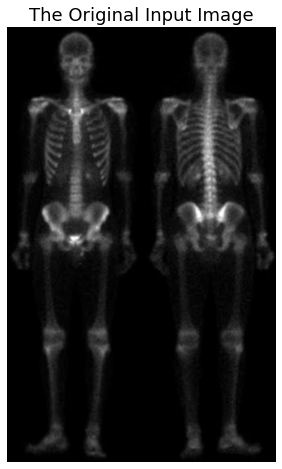

In [2]:
# Question 01 - Load the input X-ray image 'WholeBoneScan.png' as f(x,y).
# Show the input image.

input_img = pil.Image.open("WholeBoneScan.png")

# loading the input image as numpy array into f(x,y), aka f_xy.

f_xy = np.array(input_img)

# Normalizing the pixels of the image to not cause output problems later.
f_xy = (f_xy - f_xy.min()) / (f_xy.max() - f_xy.min())

# Showing the input image in grayscale.

fig, ax = plt.subplots(figsize=(10,8))
plt.title("The Original Input Image", size=18)
plt.axis('off')
ax.imshow(f_xy, cmap="gray")
plt.show()

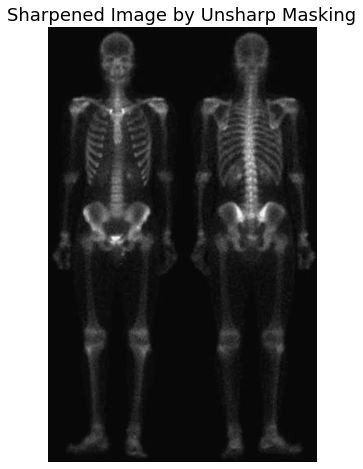

In [3]:
# Question 02 - Unsharp masking and highboost filtering.
# Blur the image by a 5-by-5 filter h(x,y):~f(x,y)=f(x,y) (x) h(x,y), where (x) denotes convolution.
# Subtract the blurred image from the original, defined it as the mask: g_mask = f(x,y) - ~f(x,y)
# Add the mask to the original: g(x,y) = f(x,y) + k * g_mask(x,y)
# Choose k=1, show the unsharp masking result g(x,y)
# Choose k>1, show the highboost filtering result g(x,y). You can check the effect of different k-values.

filter_box = np.ones((5,5));
filter_box = filter_box / 25;
blurred_img = sig.convolve2d(f_xy, filter_box, mode='same')
#blurred_img = pil.Image.fromarray(blurred_img)

# subtract the blurred image from the original to get g_mask
g_mask = f_xy - blurred_img
# add the mask to the original to get g_xy.
# Choosing k=1 to get unsharp masking result.
unsharp_mask = f_xy + (1 * g_mask)

# Plotting the Sharpened Image by Unsharp Masking.
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Sharpened Image by Unsharp Masking", size=18)
plt.axis('off')
ax.imshow(unsharp_mask, cmap="gray")
plt.show()

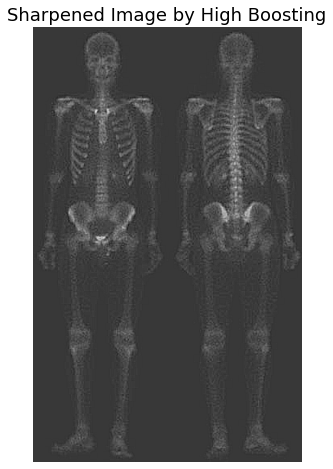

In [4]:
# Choosing k>1 to get the highboost filtering result.
highboost_filter = f_xy + (10 * g_mask)

# Plotting the Sharpened Image by High Boosting
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Sharpened Image by High Boosting", size=18)
plt.axis('off')
ax.imshow(highboost_filter, cmap="gray")
plt.show()

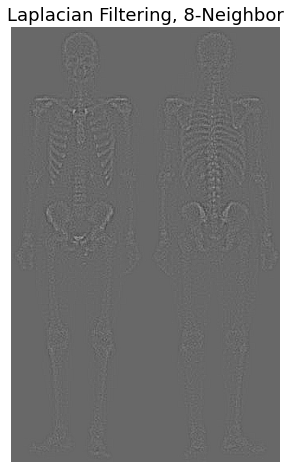

In [5]:
# Question 03 - Sharpening by Laplacian filtering.
# define a Laplacian kernel h(x,y) = [-1,-1,-1;-1,8,-1;-1,-1,-1]
# filter the original image by this Laplacian kernel: delta squared f(x,y) = f(x,y) (*) h(x,y)
# add the second-order derivative to the original image: g(x,y) = f(x,y) + c * delta squared f(x,y).
# Show g(x,y). You can check the effect of different c values.

laplacian_kernel = np.array([
    [-1,-1,-1],
    [-1, 8,-1],
    [-1,-1,-1]
])

filter_laplacian = sig.convolve2d(f_xy, laplacian_kernel, mode='same')

# Plotting the Laplacian Filtering, 8-Neighbor
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Laplacian Filtering, 8-Neighbor", size=18)
plt.axis('off')
ax.imshow(filter_laplacian, cmap="gray")
plt.show()


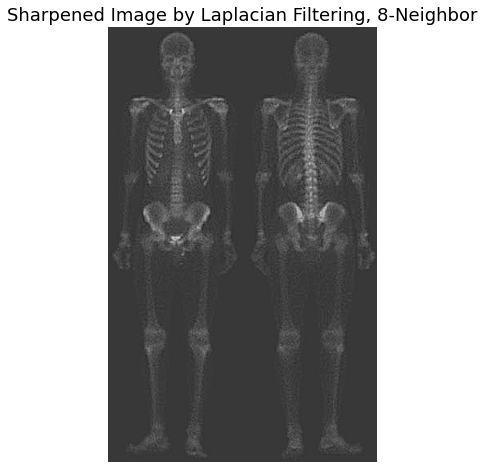

In [6]:
# add second order derivative to the original.
# Using c = 8.
laplacian_img = f_xy + (10 * filter_laplacian)

# Plotting the Sharpened Image by Laplacian Filtering, 8-neighbor
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Sharpened Image by Laplacian Filtering, 8-Neighbor", size=18)
plt.axis('off')
ax.imshow(highboost_filter, cmap="gray")
plt.show()

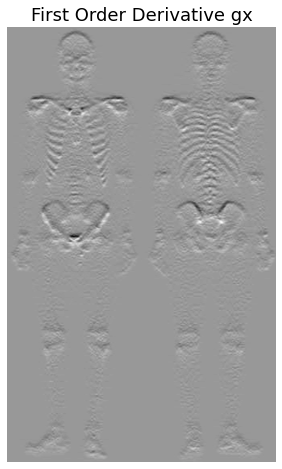

In [7]:
# Question 04 - Calculating the gradient.

# Define the sober filters: h_x (x,y) = [-1,-2,-1;0,0,0;1,2,1].
# and h_y (x,y) = [-1,0,1;-2,0,2;-1,0,1].
# Calculate the first order derivatives: delta_x f(x,y) = g_x = f(x,y) (*) h_x (x,y).
# and delta_y f(x,y) = g_y = f(x,y) (*) h_y (x,y).
# Show g_x and g_y.

sober_filter_x = np.array([
    [-1,-2,-1],
    [ 0, 0, 0],
    [ 1, 2, 1]
])

sober_filter_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

g_x = sig.convolve2d(f_xy, sober_filter_x, mode='same')
g_y = sig.convolve2d(f_xy, sober_filter_y, mode='same')

# Plotting the First Order Derivative g_x
fig, ax = plt.subplots(figsize=(10,8))
plt.title("First Order Derivative gx", size=18)
plt.axis('off')
ax.imshow(g_x, cmap="gray")
plt.show()

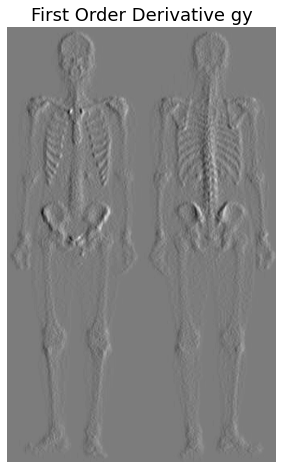

In [8]:
# Plotting the First Order Derivative g_y
fig, ax = plt.subplots(figsize=(10,8))
plt.title("First Order Derivative gy", size=18)
plt.axis('off')
ax.imshow(g_y, cmap="gray")
plt.show()

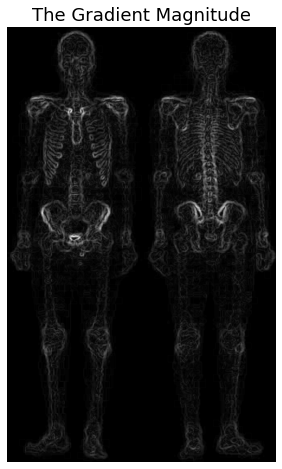

In [9]:
# Calculate the gradient magnitude: 
# || delta f(x,y) ||_2 = sqrt ((g_x)^2 + (g_y)^2). Show the magnitude.

gradient_magnitude = np.sqrt(g_x**2 + g_y**2)

# Plotting the Gradient Magnitude of gx and gy
fig, ax = plt.subplots(figsize=(10,8))
plt.title("The Gradient Magnitude", size=18)
plt.axis('off')
ax.imshow(gradient_magnitude, cmap="gray")
plt.show()

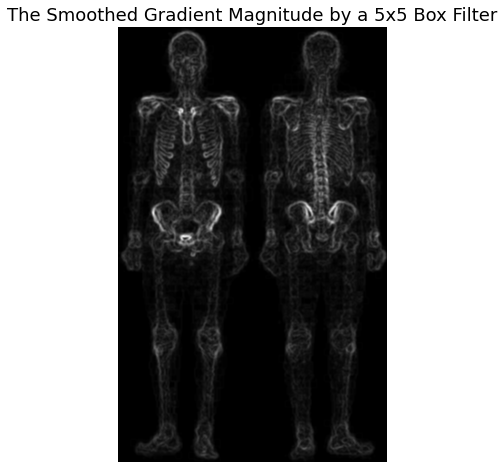

In [10]:
# Blur the gradient magnitude image by a 5-by-5 box filter h(x)
# ~||delta f(x,y)||_2 = ||delta f(x,y)||_2 (*) h(x,y).
# Show ~||delta f(x,y)||_2. Normalize this blurred magnitude image with
# the values in [0,1] for the next step.

smoothed_grad_mag = sig.convolve2d(gradient_magnitude, filter_box, mode='same')

# Plotting the Smoothed Gradient Magnitude by 5x5 box filter
fig, ax = plt.subplots(figsize=(10,8))
plt.title("The Smoothed Gradient Magnitude by a 5x5 Box Filter", size=18)
plt.axis('off')
ax.imshow(smoothed_grad_mag, cmap="gray")
plt.show()

# Normalizing the blurred magnitude image with the values in [0,1].
smoothed_grad_mag = (smoothed_grad_mag - np.min(smoothed_grad_mag)) / (np.max(smoothed_grad_mag) - np.min(smoothed_grad_mag))

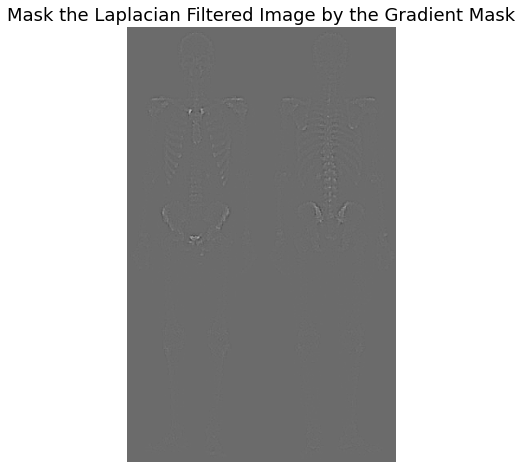

In [11]:
# Question 05 - Multiply the Laplacian filtered image delta squared f(x,y)
# from step 3 with the gradient mask image (blurred magnitude image from step 4):
# delta squared f(x,y) = delta squared f(x,y) * ~||delta f(x,y)||_2, where * stands for elementwise multiplication.
# Show delta squared f(x,y).

filter_laplacian = filter_laplacian * smoothed_grad_mag

# Plotting the Masked Laplacian filtered image by the Gradient Mask
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Mask the Laplacian Filtered Image by the Gradient Mask", size=18)
plt.axis('off')
ax.imshow(filter_laplacian, cmap="gray")
plt.show()


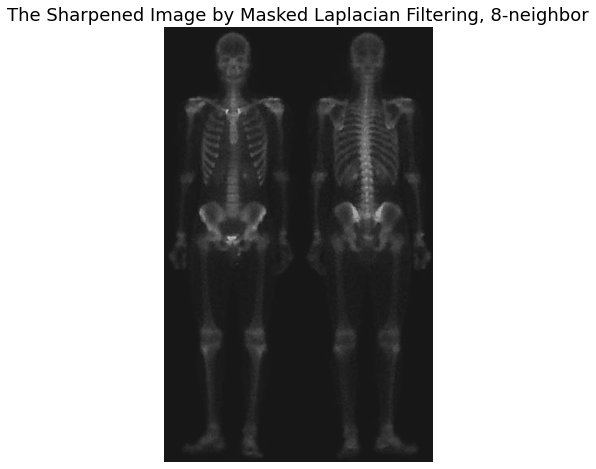

In [12]:
# Question 06 - Add the weighted second-order derivative to the original image:
# g(x,y) = f(x,y) + c * delta squared f(x,y). Show g(x,y).
# Will be using a random value for c.

sharpened_by_laplacian = f_xy + (2 * filter_laplacian)

# Plotting the sharpened image by masked laplacian filtering, 8-neighbor
fig, ax = plt.subplots(figsize=(10,8))
plt.title("The Sharpened Image by Masked Laplacian Filtering, 8-neighbor", size=18)
plt.axis('off')
ax.imshow(sharpened_by_laplacian, cmap="gray")
plt.show()

sharpened_by_laplacian = (sharpened_by_laplacian - np.min(sharpened_by_laplacian)) / (np.max(sharpened_by_laplacian) - np.min(sharpened_by_laplacian))

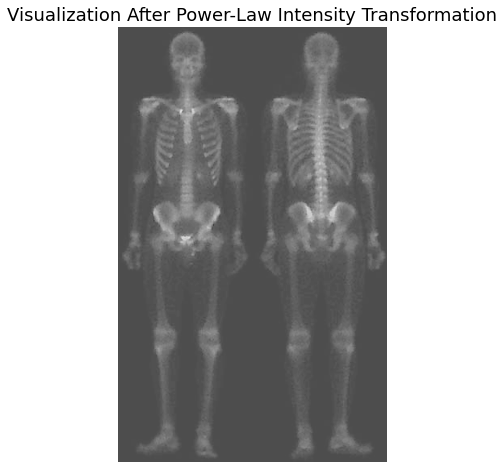

In [13]:
# Question 07 - Apply the power-law intensity transformation 
# s = gamma^0.5 onto g(x,y). Show the output image after the intensity transformation.
# Choosing random value to be placed for gamma.

power_law_img = sharpened_by_laplacian ** 0.5


# Plotting the visualization after power-law intensity transformation
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Visualization After Power-Law Intensity Transformation", size=18)
plt.axis('off')
ax.imshow(power_law_img, cmap="gray")
plt.show()
